In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd  #Importas bases de datos
import seaborn as sns  #Importas la biblioteca Seaborn
import numpy as np  #Importas la biblioteca NumPy
import matplotlib.pyplot as plt  #Importas la biblioteca Matplotlib para graficar
import plotly.express as px



In [3]:
df1 = pd.read_csv("results.csv") ##importo base de datos
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
df1.dtypes ##listo las variables

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [5]:
df1['date'] = pd.to_datetime(df1['date'])  # Convierte la columna 'date' a datetime si no lo es


## Tendencia de goles como local y como visitante

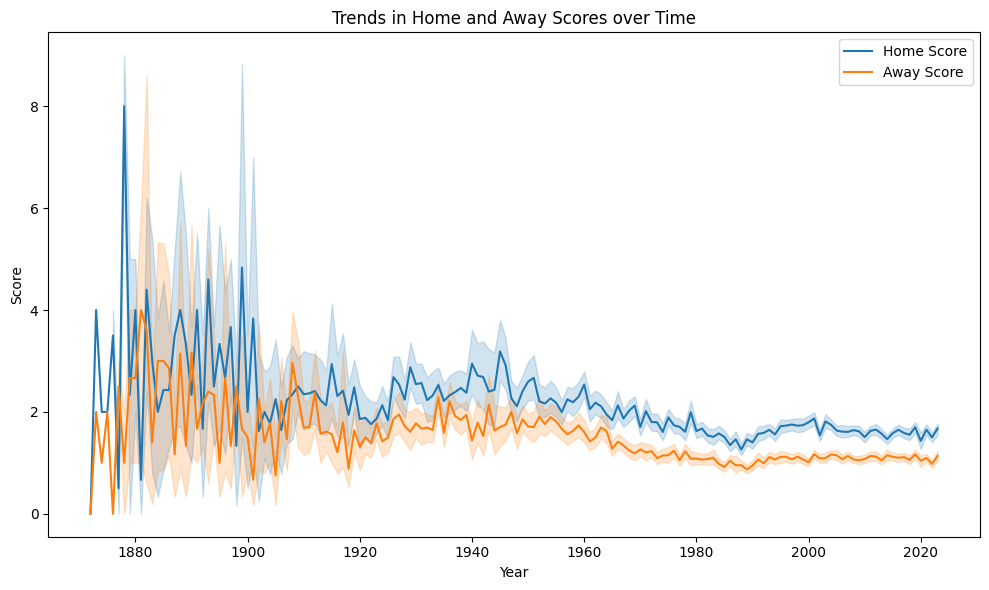

In [6]:
# Creo columna para año
df1['year'] = df1['date'].dt.year

# Time series analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='home_score', data=df1, label='Home Score')
sns.lineplot(x='year', y='away_score', data=df1, label='Away Score')
plt.title('Trends in Home and Away Scores over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

**Sorpresa para nadie:** Marca más goles el equipo local, el efecto afición y campo afecta al deporte.

## Máximos goleadores

In [7]:
df2 = pd.read_csv("goalscorers.csv") ##importo base de datos
df2.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [8]:
# Agrupa y cuenta los goles por jugador
goleadores = df2.groupby('scorer')['scorer'].count().reset_index(name='total_goles')
# Ordeno de mayor a menor
goleadores = goleadores.sort_values(by='total_goles', ascending=False)

#Saco los NA (lo hago asi porque dropna no funciona)
goleadores = goleadores[goleadores['scorer'] != 'nan']
goleadores


,scorer,total_goles
2452,Cristiano Ronaldo,91
10670,Robert Lewandowski,56
7462,Lionel Messi,54
713,Ali Daei,49
8667,Miroslav Klose,48
...,...,...
7779,Majdi Samir,1
2453,Cristián Zapata,1
2454,Cristóbal Parralo,1
7774,Mai Aih Naing,1


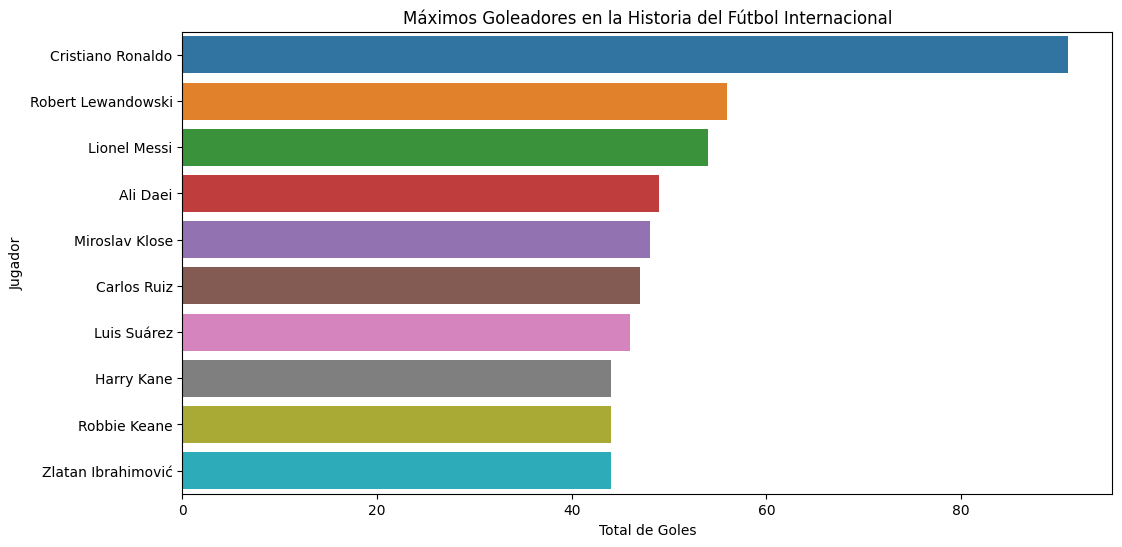

In [9]:

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='total_goles', y='scorer', data=goleadores.head(10))
plt.title('Máximos Goleadores en la Historia del Fútbol Internacional')
plt.xlabel('Total de Goles')
plt.ylabel('Jugador')
plt.show()

Cristiano Ronaldo pichichi global. The best.

## Máximos goleadores por década (trend)

In [10]:
# Hago que date sea de tipo datetime
df2['date'] = pd.to_datetime(df2['date'])

# Quito los nan
df3 = df2[df2['scorer'] != 'nan']



# Agrupar por década y goleador y calcular los goles
df3['decada'] = pd.cut(df3['date'].dt.year, bins=range(1910, 2030, 10), right=False)
goleadores_decada = df3.groupby(['decada', 'scorer'])['scorer'].count().reset_index(name='total_goles')
goleadores_decada = goleadores_decada.sort_values(by='total_goles', ascending=False)

# Convierto a numerico la variable total_goles
goleadores_decada['total_goles'] = pd.to_numeric(goleadores_decada['total_goles'])

# Encuentra el máximo goleador de cada década
maximos_goleadores = goleadores_decada.groupby('decada')['total_goles'].idxmax()

# Filtra el DataFrame original para obtener solo los máximos goleadores de cada década
maximos_goleadores_df = goleadores_decada.loc[maximos_goleadores]

maximos_goleadores_df = maximos_goleadores_df.dropna(subset=['scorer'])


In [11]:
#Cambio la categoria decada a int

# Aseguro que 'decada' es del tipo cadena de texto (str)
maximos_goleadores_df['decada'] = maximos_goleadores_df['decada'].astype(str)

#Saco el segundo valor de cada categoria(cuando acaba la decada) como interger
maximos_goleadores_df['decada_numerica'] = maximos_goleadores_df['decada'].str.split(',').str[1].str.strip(')').astype(int)

maximos_goleadores_df


,decada,scorer,total_goles,decada_numerica
2026,"[1910, 1920)",Carlos Scarone,6,1920
23367,"[1920, 1930)",Pedro Petrone,10,1930
31459,"[1930, 1940)",Gyula Zsengellér,10,1940
49671,"[1940, 1950)",Norberto Doroteo Méndez,17,1950
60307,"[1950, 1960)",Just Fontaine,21,1960
70726,"[1960, 1970)",Eusébio,23,1970
84824,"[1970, 1980)",Gerd Müller,25,1980
100744,"[1980, 1990)",Karl-Heinz Rummenigge,28,1990
111471,"[1990, 2000)",Gabriel Batistuta,31,2000
126437,"[2000, 2010)",Jared Borgetti,37,2010


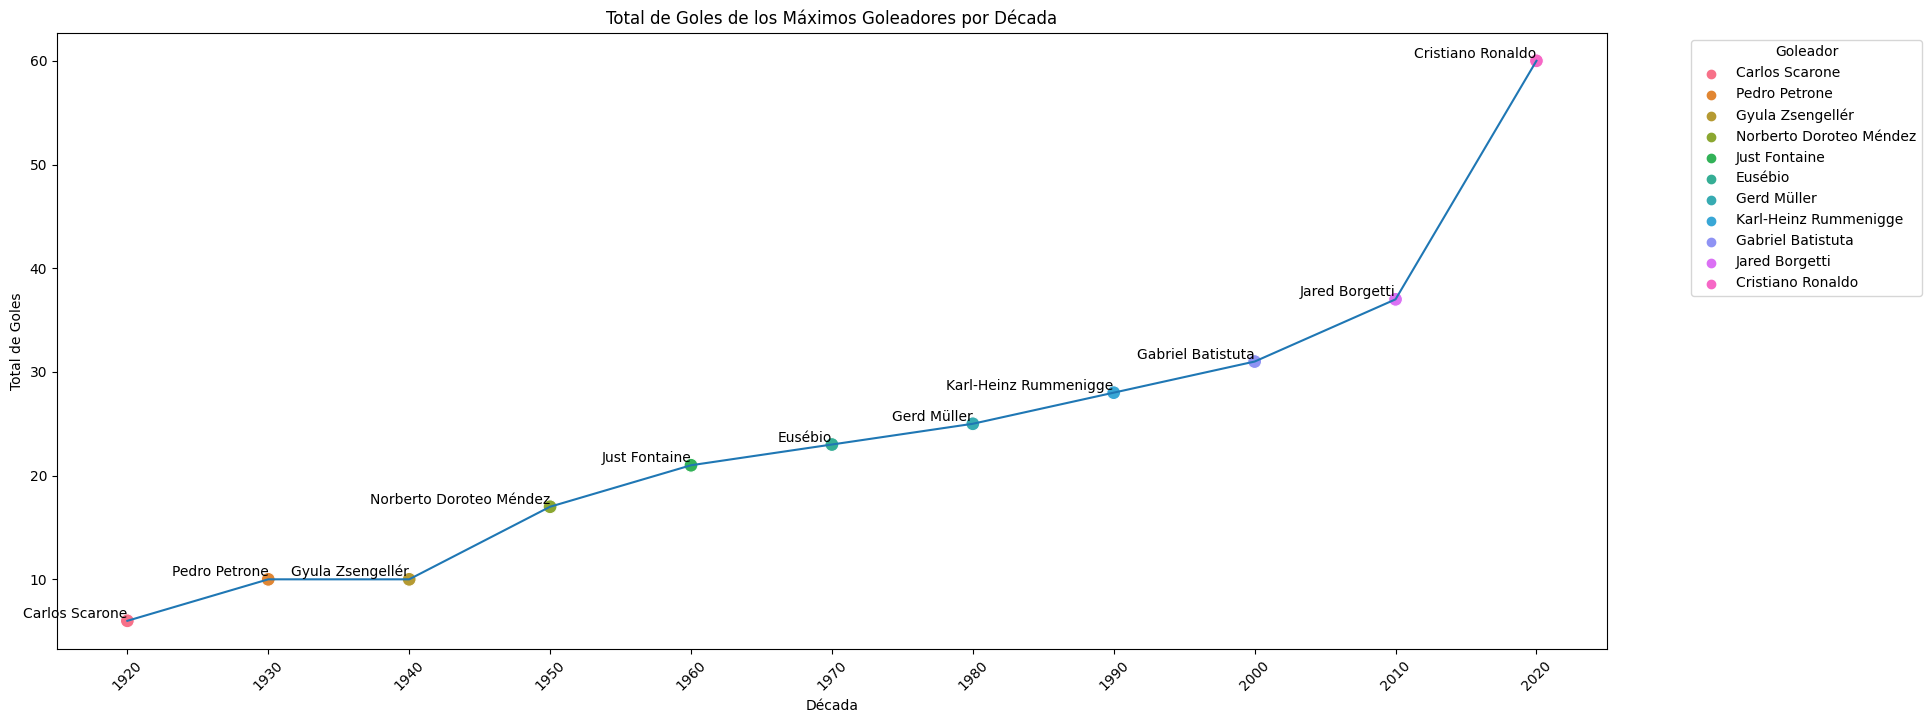

In [12]:

plt.figure(figsize=(20, 8))
sns.scatterplot(x='decada_numerica', y='total_goles', hue='scorer', data=maximos_goleadores_df, s=100, marker='o')
sns.lineplot(x='decada_numerica', y='total_goles', data=maximos_goleadores_df)

# Personaliza los marcadores en el eje x para mostrar cada 10 años
plt.xticks(range(min(maximos_goleadores_df['decada_numerica']), max(maximos_goleadores_df['decada_numerica'])+1, 10))

plt.title('Total de Goles de los Máximos Goleadores por Década')
plt.xlabel('Década')
plt.ylabel('Total de Goles')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Goleador')
# Agregar etiquetas de goleadores a los puntos
for i, row in maximos_goleadores_df.iterrows():
    plt.text(row['decada_numerica'], row['total_goles'], row['scorer'], fontsize=10, ha='right', va='bottom')

plt.show()




Pichichis por décadas, CR7 rompe la tendencia. Fuera de serie.

## Carga de partidos internacionales
Las llamadas fechas FIFA, como han evolucionado durante el tiempo.

In [13]:
df1['golestotales'] = df1['home_score'] + df1['away_score']
goles_totales_por_año = df1.groupby('year')['golestotales'].sum().reset_index()

partidos_año = df1.groupby('year').size()
partidos_año = partidos_año.to_frame().rename(columns={0: 'num_partidos'})


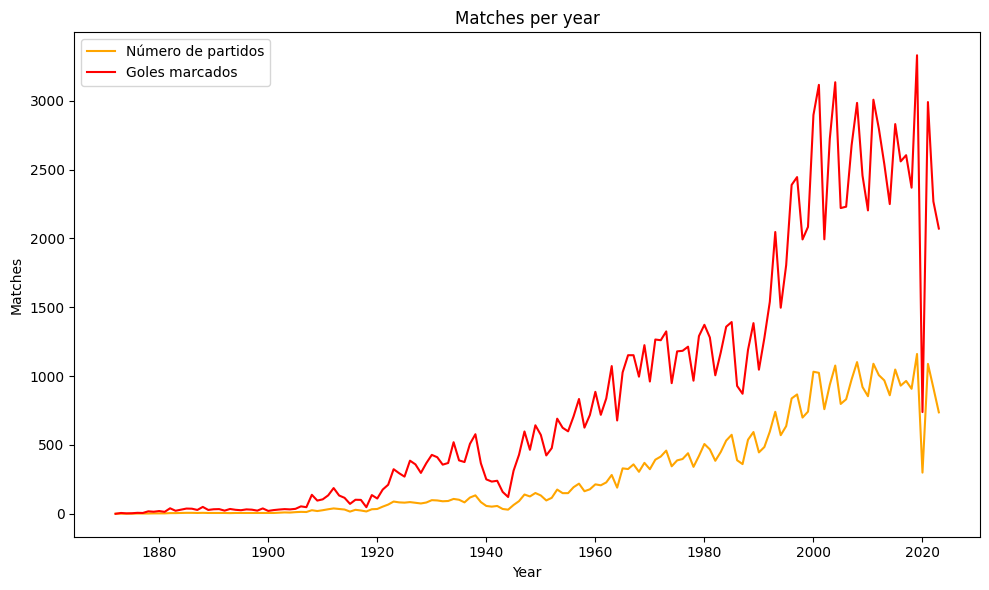

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='num_partidos', data=partidos_año, label='Número de partidos', color='orange')
sns.lineplot(x='year', y='golestotales', data=goles_totales_por_año, label='Goles marcados',color='red')
plt.title('Matches per year')
plt.xlabel('Year')
plt.ylabel('Matches')
plt.legend()
plt.tight_layout()
plt.show()

Cada vez hay más partidos internacionales, que si torneo$ inventados que si amistosos.etc . Esto implica a su vez un aumento del número total de goles, sin embargo ahora veremos que no se debe a que se marque más goles por partido, el número absoluto aumenta debido a que hay más partidos


## Número de goles por partido
Análisis temporal del promedio goleador por partido.

In [15]:
#hago un merge
goles_porpartido= goles_totales_por_año.merge(partidos_año, on ='year')
goles_porpartido['goles_partido'] = goles_porpartido['golestotales'] / goles_porpartido['num_partidos']
goles_porpartido

,year,golestotales,num_partidos,goles_partido
0,1872,0,1,0.000000
1,1873,6,1,6.000000
2,1874,3,1,3.000000
3,1875,4,1,4.000000
4,1876,7,2,3.500000
...,...,...,...,...
147,2019,3331,1161,2.869078
148,2020,739,299,2.471572
149,2021,2991,1089,2.746556
150,2022,2269,915,2.479781


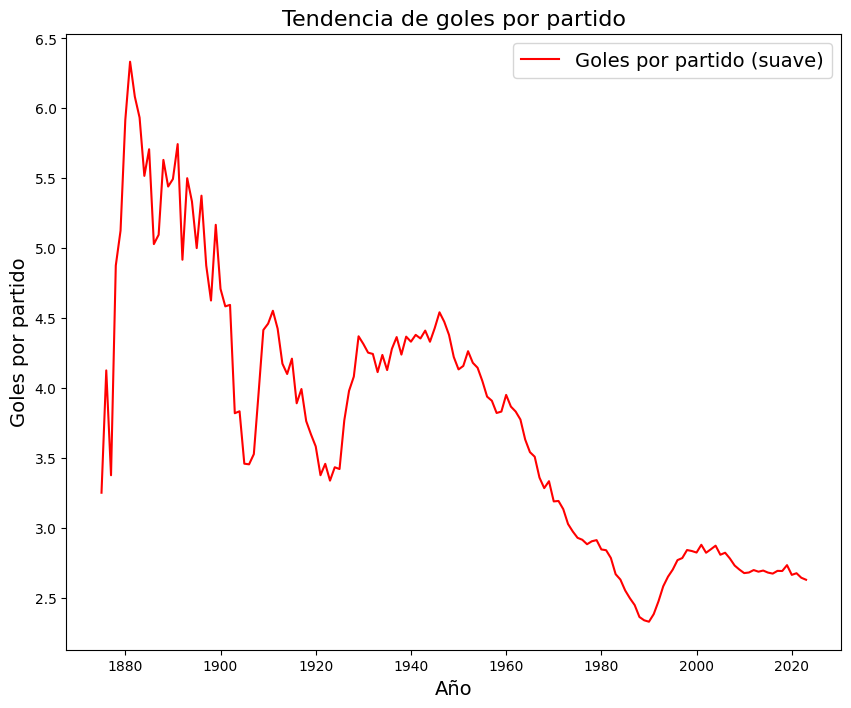

In [16]:

# Suavizamos la tendencia
goles_porpartido['goles_partido_suave'] = goles_porpartido['goles_partido'].rolling(4).mean()

# Dibujamos el gráfico
plt.figure(figsize=(10, 8))
sns.lineplot(x='year', y='goles_partido_suave', data=goles_porpartido, label='Goles por partido (suave)', color='red')

# Añadimos etiquetas y títulos
plt.title('Tendencia de goles por partido', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Goles por partido', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Se podria pensar que CR7 parte de ventaja porque cada vez se marca más, no es cierto, ahora tienen más oportunidades de marcar porque hay más partidos.
Sin embargo, se marca menos por cada partido jugado. Las defensas de ahora son más elaboradas, las estrategias más medidas,todo se estudia. Antes el fútbol era más espontáneo y menos elaborado, por ende habia más goles.
Esto se ve claramente en partidos de Laliga Santander por ejemplo, ver un Getafe-Cádiz, es un suplicio para el espectador.

## Probabilidad de gol por minuto de juego
¿En qué parte se marca más? ¿En qué minutos? [Ver gráfico interactivo]

In [17]:
goles_por_minuto = df2.groupby('minute')['minute'].count().reset_index(name='goles')

goles_90minutos = goles_por_minuto.head(90)
total = goles_90minutos['goles'].sum()

goles_90minutos['probabilidad'] = goles_90minutos['goles'] / total *100

goles_90minutos


,minute,goles,probabilidad
0,1.0,189,0.465242
1,2.0,324,0.797558
2,3.0,296,0.728633
3,4.0,325,0.800020
4,5.0,365,0.898484
...,...,...,...
85,86.0,483,1.188952
86,87.0,503,1.238184
87,88.0,569,1.400650
88,89.0,643,1.582808


In [18]:


# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de dispersión con colores basados en 'probabilidad'
fig = px.scatter(goles_90minutos, x='minute', y='probabilidad', color='probabilidad', size='probabilidad',
                 hover_data=['minute', 'probabilidad'],
                 title='Probabilidades de gol por minuto de juego',
                 labels={'minute': 'Minuto', 'probabilidad': 'Probabilidad'},
                 size_max=20,
                 color_continuous_scale='viridis',
                 range_color= [0, 3])

# Ajustar el rango del eje y
fig.update_yaxes(range=[0, 4])

# Personalizar el formato del texto al mantener el ratón sobre un punto
fig.update_traces(hovertemplate='Minuto %{x}: %{y:.2}%')

# Mostrar el gráfico interactivo
fig.show()





Como se observa, se marca más en la segunda parte que en la primera, y tambien hay una tendencia alcista a marcar en los minutos finales de cada parte. No solo en el 45' y 90' por el hecho de agrupar los descuentos añadidos, sino es un cambio de tendencia que se empieza a observar en los minutos previos al minuto final.